In [1]:
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn import metrics

from sklearn.model_selection import train_test_split

In [2]:
np.random.normal(0, 1, 20)

array([ 0.65607632, -0.28638039,  1.11379497, -1.40065147, -0.79017725,
       -1.62294353, -0.66268986, -0.20217483, -0.41718774, -0.31997111,
        0.30989836, -0.9876883 ,  0.72581936,  0.79913435, -1.02716681,
       -0.00946922,  0.24189328, -0.34153149, -0.82640489, -1.18327167])

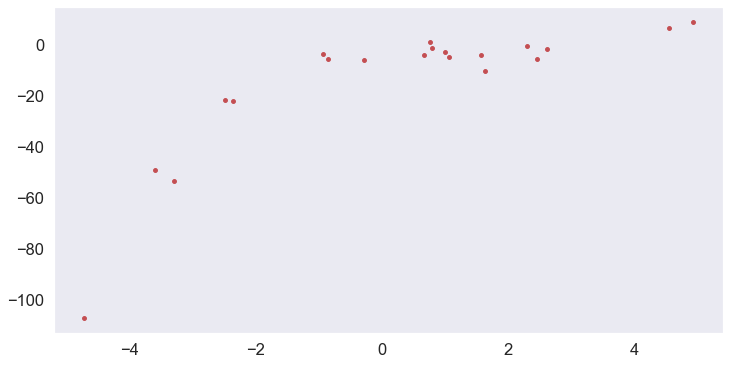

In [3]:
np.random.seed(0)
X_data = 2 - 3 * np.random.normal(0, 1, 20)

y_data = X_data - 2 * (X_data ** 2) + 0.5 * (X_data ** 3) + np.random.normal(-3, 3, 20)

plt.figure(figsize=(12, 6))
plt.scatter(X_data, y_data, s=15, c='r');
plt.grid()

In [4]:
y_data

array([ -53.46841187,   -1.26255958,   -3.50619264, -107.22320039,
        -49.13195018,    8.90122353,   -5.46624176,   -5.76263165,
         -0.60058568,    1.2226779 ,   -3.95663744,  -21.98989452,
         -6.11812275,  -10.46843964,   -4.11955719,   -3.02941914,
        -21.76152272,   -1.51295226,   -4.75491157,    6.50723268])

In [5]:
X_data

array([-3.29215704,  0.79952837, -0.93621395, -4.7226796 , -3.60267397,
        4.93183364, -0.85026525,  2.45407162,  2.30965656,  0.76820449,
        1.56786929, -2.36282052, -0.28311318,  1.63497495,  0.6684103 ,
        0.99897702, -2.48223722,  2.61547479,  1.0607969 ,  4.56228722])

In [6]:
X_data[:, np.newaxis]

array([[-3.29215704],
       [ 0.79952837],
       [-0.93621395],
       [-4.7226796 ],
       [-3.60267397],
       [ 4.93183364],
       [-0.85026525],
       [ 2.45407162],
       [ 2.30965656],
       [ 0.76820449],
       [ 1.56786929],
       [-2.36282052],
       [-0.28311318],
       [ 1.63497495],
       [ 0.6684103 ],
       [ 0.99897702],
       [-2.48223722],
       [ 2.61547479],
       [ 1.0607969 ],
       [ 4.56228722]])

Let’s apply a linear regression model to this dataset.

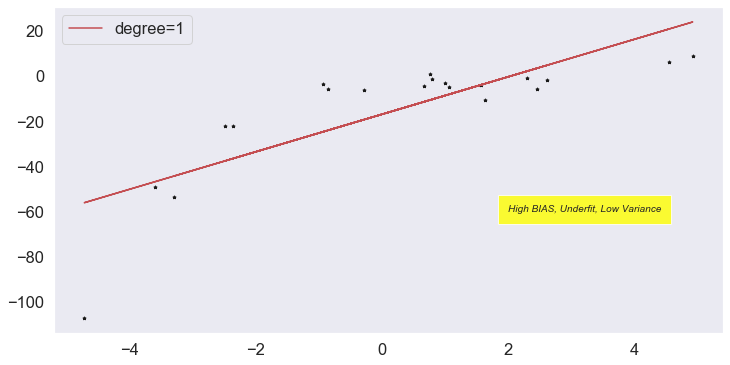

In [7]:
# transforming the data to include another axis
X = X_data[:, np.newaxis]
y = y_data[:, np.newaxis]

linreg = LinearRegression()
linreg.fit(X, y)

y_pred = linreg.predict(X)

plt.figure(figsize=(12, 6))

plt.scatter(X, y, s=10, c='k', marker='*')
plt.plot(X, y_pred, color='r', label='degree=1');

plt.text(2, -60, 'High BIAS, Underfit, Low Variance', style='italic',
        bbox={'facecolor':'yellow', 'alpha':0.8, 'pad':10})
plt.grid()
plt.legend();


In [8]:
id(X), id(X_data)

(2152420478528, 2152418156912)

The plot of the best fit line is..

We can see that the straight line is unable to capture the patterns in the data. This is an example of __under-fitting__. Computing the RMSE and R²-score of the linear line gives:

In [9]:
print('y-intercept             : ', linreg.intercept_)
print('beta coefficients       : ', linreg.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('r2 value                : ', metrics.r2_score(y, y_pred))

y-intercept             :  [-16.79645067]
beta coefficients       :  [[8.29238755]]
Mean Abs Error   MAE    :  11.889431199878441
Mean Sq  Error MSE      :  253.07217948430375
Root Mean Sq Error RMSE :  15.908242501429998
r2 value                :  0.6386750054827146


Computing the RMSE and R²-score

To overcome under-fitting, we need to increase the complexity of the model.

To convert the original features into their higher order terms we will use the __PolynomialFeatures__ class provided by scikit-learn. Next, we train the model using Linear Regression.

#### let us try quadratic 

In [10]:
polynomial_features= PolynomialFeatures(degree=2)

x_poly2 = polynomial_features.fit_transform(X)

In [11]:
X[:3]

array([[-3.29215704],
       [ 0.79952837],
       [-0.93621395]])

In [12]:
x_poly2[:3]

array([[ 1.        , -3.29215704, 10.83829796],
       [ 1.        ,  0.79952837,  0.63924562],
       [ 1.        , -0.93621395,  0.87649656]])

In [13]:
linreg_poly2 = LinearRegression()
linreg_poly2.fit(x_poly2, y)

y_poly_pred2 = linreg_poly2.predict(x_poly2)

In [15]:
print('y-intercept             : ', linreg_poly2.intercept_)
print('beta coefficients       : ', linreg_poly2.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y, y_poly_pred2))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y, y_poly_pred2))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y, y_poly_pred2)))
print('r2 value                : ', metrics.r2_score(y, y_poly_pred2))

y-intercept             :  [-6.11973959]
beta coefficients       :  [[ 0.          8.48492679 -1.62853134]]
Mean Abs Error   MAE    :  8.33658919979118
Mean Sq  Error MSE      :  102.42325465734493
Root Mean Sq Error RMSE :  10.120437473614711
r2 value                :  0.8537647164420812


In [16]:
# sort the values of x before line plot
sort_axis  = operator.itemgetter(0)
sorted_zip = sorted(zip(X, y_poly_pred2), key=sort_axis)

X2, y_poly_pred2 = zip(*sorted_zip)

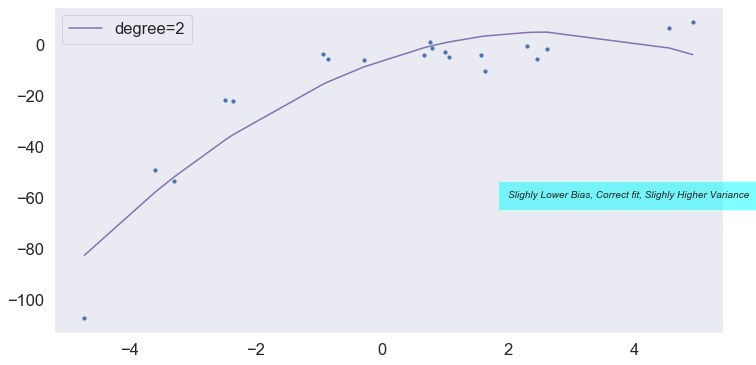

In [18]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, s=10)

plt.plot(X2, y_poly_pred2, color='m', label='degree=2')

plt.text(2, -60, 'Slighly Lower Bias, Correct fit, Slighly Higher Variance', style='italic',
        bbox={'facecolor':'cyan', 'alpha':0.5, 'pad':10})
plt.grid()
plt.legend()

It is quite clear from the plot that the quadratic curve is able to fit the data better than the linear line. Computing the RMSE and R²-score of the quadratic plot gives:

RMSE of polynomial regression is 10.120437473614711.

R2 of polynomial regression is 0.8537647164420812.

#### let us try cubic curve (degree=3)

In [19]:
polynomial_features= PolynomialFeatures(degree=3)

x_poly3 = polynomial_features.fit_transform(X)

In [20]:
linreg_poly3 = LinearRegression()
linreg_poly3.fit(x_poly3, y)

y_poly_pred3 = linreg_poly3.predict(x_poly3)

In [22]:
print('y-intercept             : ', linreg_poly3.intercept_)
print('beta coefficients       : ', linreg_poly3.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y, y_poly_pred3))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y, y_poly_pred3))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y, y_poly_pred3)))
print('r2 value                : ', metrics.r2_score(y, y_poly_pred3))

y-intercept             :  [-2.13159804]
beta coefficients       :  [[ 0.          0.99141388 -2.10330137  0.49338043]]
Mean Abs Error   MAE    :  2.6605031581551097
Mean Sq  Error MSE      :  11.901779012038903
Root Mean Sq Error RMSE :  3.449895507408725
r2 value                :  0.9830071790386679


In [23]:
# # sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X, y_poly_pred3), key=sort_axis)

X3, y_poly_pred3 = zip(*sorted_zip)

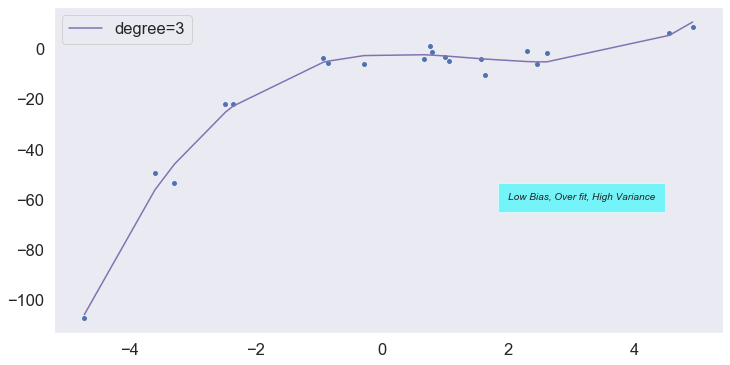

In [24]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, s=15)

plt.plot(X3, y_poly_pred3, color='m', label='degree=3')

plt.text(2, -60, 'Low Bias, Over fit, High Variance', style='italic',
        bbox={'facecolor':'cyan', 'alpha':0.5, 'pad':10})
plt.grid()
plt.legend();

#### let us try 20th degree curve (degree=20)

In [25]:
polynomial_features= PolynomialFeatures(degree=20)

x_poly20 = polynomial_features.fit_transform(X)

In [26]:
linreg_poly20 = LinearRegression()
linreg_poly20.fit(x_poly20, y)

y_poly_pred20 = linreg_poly20.predict(x_poly20)

In [27]:
linreg_poly20.coef_

array([[-2.19944047e-02,  1.18067670e+01, -2.61351649e+00,
        -1.40013410e+01, -3.03189113e+00, -6.19753330e+00,
         7.12649237e+00,  6.41053334e+00,  6.48416301e+00,
         4.04416514e+00, -1.23347782e+01, -2.95472227e+00,
         5.32203175e+00,  6.69515180e-01, -1.00781860e+00,
        -7.31142887e-02,  9.34540498e-02,  3.98451300e-03,
        -4.07377950e-03, -8.11282063e-05,  6.62364255e-05]])

In [28]:
print('y-intercept             : ', linreg_poly20.intercept_)
print('beta coefficients       : ', linreg_poly20.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y, y_poly_pred20))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y, y_poly_pred20))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y, y_poly_pred20)))
print('r2 value                : ', metrics.r2_score(y, y_poly_pred20))

y-intercept             :  [-3.12596971]
beta coefficients       :  [[-2.19944047e-02  1.18067670e+01 -2.61351649e+00 -1.40013410e+01
  -3.03189113e+00 -6.19753330e+00  7.12649237e+00  6.41053334e+00
   6.48416301e+00  4.04416514e+00 -1.23347782e+01 -2.95472227e+00
   5.32203175e+00  6.69515180e-01 -1.00781860e+00 -7.31142887e-02
   9.34540498e-02  3.98451300e-03 -4.07377950e-03 -8.11282063e-05
   6.62364255e-05]]
Mean Abs Error   MAE    :  0.5727802588207828
Mean Sq  Error MSE      :  1.2390923703938996
Root Mean Sq Error RMSE :  1.1131452602396057
r2 value                :  0.9982308800404244


In [29]:
# # sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X, y_poly_pred20), key=sort_axis)

X20, y_poly_pred20 = zip(*sorted_zip)

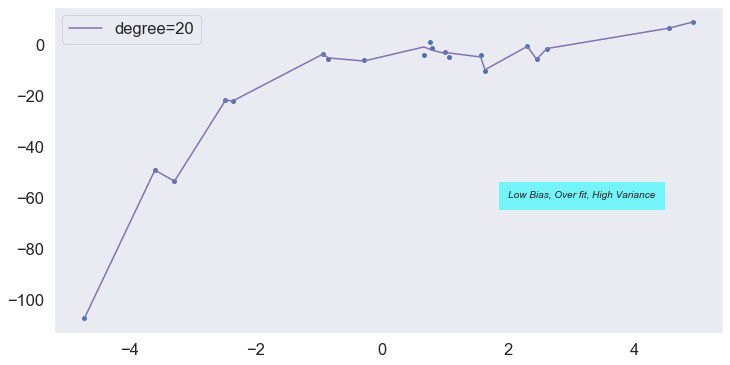

In [30]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, s=15)

plt.plot(X3, y_poly_pred20, color='m', label='degree=20')
plt.text(2, -60, 'Low Bias, Over fit, High Variance', style='italic',
        bbox={'facecolor':'cyan', 'alpha':0.5, 'pad':10})
plt.grid()
plt.legend();

For degree=20, the model is also capturing the noise in the data. This is an example of __over-fitting__. Even though this model passes through most of the data, it will fail to generalize on unseen data.

# Comparision plot

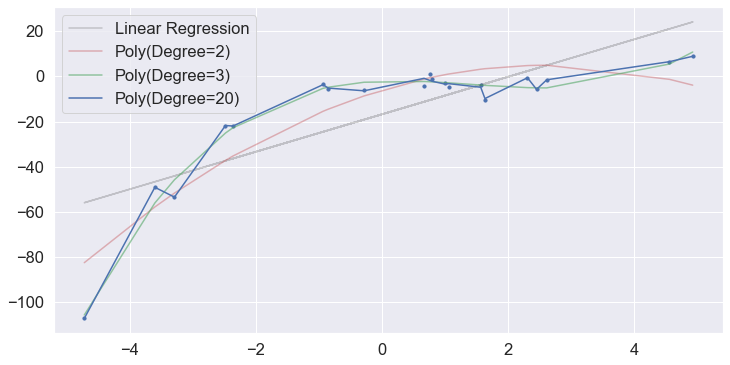

In [31]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, s=10)

# linear regression line
plt.plot(X, y_pred, color='k', label='Linear Regression', alpha=.2)

# degree = 2
plt.plot(X2, y_poly_pred2, color='r', label='Poly(Degree=2)', alpha=.4)

# degree = 3
plt.plot(X3, y_poly_pred3, color='g', label='Poly(Degree=3)', alpha=.6)

# degree = 20
plt.plot(X20, y_poly_pred20, color='b', label='Poly(Degree=20)')

plt.legend();

# Bias variance trade off

- we can observe that as the model complexity increases, the bias decreases and the variance increases and vice-versa. 
- Ideally, a machine learning model should have __low variance and low bias.__ But practically it’s impossible to have both.

- Therefore to achieve a good model that performs well both on the train and unseen data, a __trade-off__ is made.

In [32]:
location = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\boston.csv"

In [33]:
# load the training data from glass data set
df = pd.read_csv(location)

In [35]:
df.shape

(506, 14)

In [36]:
df.head()

,crime_rate,proportion_res_land,proportion_business,"river""",NO,avg_rooms,proportion_units,distance,accessibility,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status,value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [37]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [42]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [43]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [44]:
# print the target variable
# print(boston_dataset.target)

In [45]:
boston = pd.DataFrame(data=boston_dataset.data, 
                      columns=boston_dataset.feature_names)

In [46]:
# get the target variable (MEDV)
boston['MEDV'] = boston_dataset.target

In [47]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [48]:
# checking missing values
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

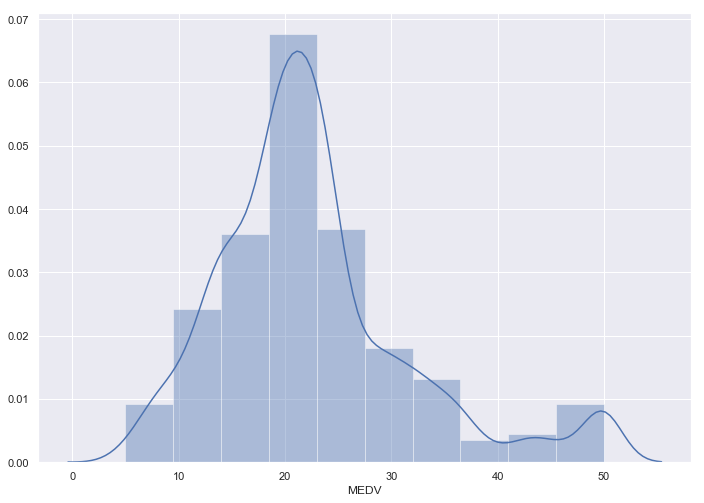

In [49]:
# distribution of the target variable MEDV
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=10)
plt.show()

values of MEDV are distributed normally with few outliers.

#### measure the linear relationships between the variables

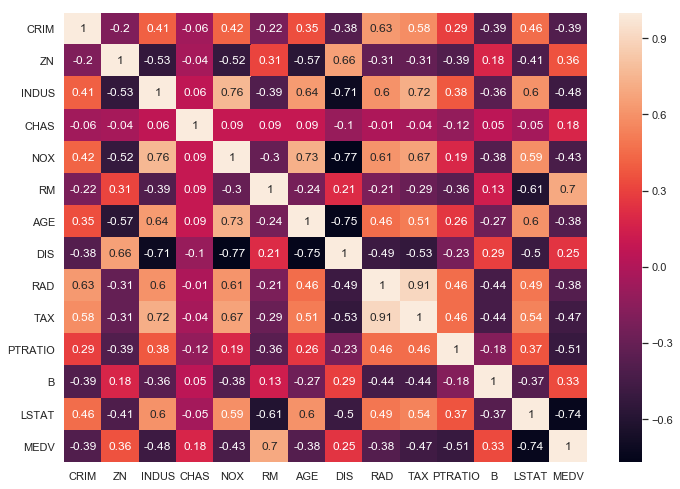

In [50]:
correlation_matrix = boston.corr().round(2)

# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True);

#### Observations

- To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV.
- RM has a strong positive correlation with MEDV (0.7) 
- LSTAT has a high negative correlation with MEDV(-0.74).

An important point in selecting features for a linear regression model is to check for __multi-co-linearity.__

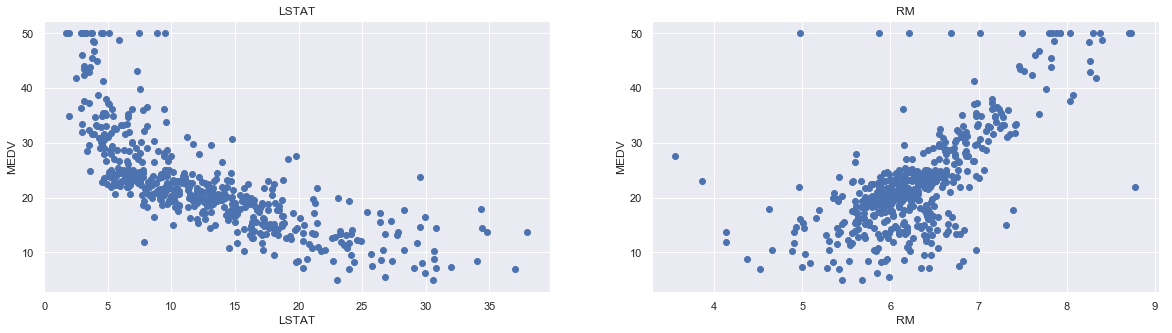

In [41]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

#### Observations:

- The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
- The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

In [42]:
# Preparing the data for training the model
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
y = boston['MEDV']

In [43]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


#### Training and testing the model

In [44]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Model evaluation

In [46]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
mse  = metrics.mean_squared_error(Y_train, y_train_predict)
rmse = (np.sqrt(metrics.mean_squared_error(Y_train, y_train_predict)))
r2   = metrics.r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
MSE is 31.77722714032021
RMSE is 5.637129335071195
R2 score is 0.6300745149331701




In [47]:
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(metrics.mean_squared_error(Y_test, y_test_predict)))
r2   = metrics.r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 5.137400784702912
R2 score is 0.6628996975186952


# Applying Polynomial Regression

- It can be seen from the above figure that LSTAT has a slight non-linear variation with the target variable MEDV. 
- We will transform the original features into higher degree polynomials before training the model.

In [48]:
degree = 2

In [49]:
poly_features = PolynomialFeatures(degree=degree)

In [50]:
# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)

In [51]:
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
# predicting on training data-set
y_train_pred = poly_model.predict(X_train_poly)

In [53]:
# predicting on test data-set
y_test_pred = poly_model.predict(poly_features.fit_transform(X_test))

In [54]:
# evaluating the model on training dataset
rmse_train = np.sqrt(metrics.mean_squared_error(Y_train, y_train_pred))
r2_train   = metrics.r2_score(Y_train, y_train_pred)

In [55]:
# evaluating the model on test dataset
rmse_test = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred))
r2_test   = metrics.r2_score(Y_test, y_test_pred)

In [56]:
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 4.703071027847755
R2 score of training set is 0.7425094297364766


The model performance for the test set
-------------------------------------------
RMSE of test set is 3.784819884545033
R2 score of test set is 0.8170372495892185


#### lets try a few degrees .. 3 to 20 and observe the RMSE and R2

- wrap the above in a function

In [65]:
def poly_function(degrees):
    
    degree_list      = []
    train_rmse_list  = []
    train_r2_list    = []
    test_rmse_list   = []
    test_r2_list     = []
    
    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree)

        # transforms the existing features to higher degree features.
        X_train_poly = poly_features.fit_transform(X_train)

        # fit the transformed features to Linear Regression
        poly_model = LinearRegression()
        poly_model.fit(X_train_poly, Y_train)

        # predicting on training data-set
        y_train_pred = poly_model.predict(X_train_poly)

        # predicting on test data-set
        y_test_pred = poly_model.predict(poly_features.fit_transform(X_test))

        # evaluating the model on training dataset
        rmse_train = np.sqrt(metrics.mean_squared_error(Y_train, y_train_pred))
        r2_train   = metrics.r2_score(Y_train, y_train_pred)

        # evaluating the model on test dataset
        rmse_test = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred))
        r2_test   = metrics.r2_score(Y_test, y_test_pred)
    
        degree_list.append(degree)
        train_rmse_list.append(rmse_train)
        train_r2_list.append(r2_train)
        test_rmse_list.append(rmse_test)
        test_r2_list.append(r2_test)
        
    return degree_list, train_rmse_list, train_r2_list, test_rmse_list, test_r2_list
    

In [66]:
degree_list = np.arange(1, 20, 1)

degree_list, train_rmse_list, train_r2_list, test_rmse_list, test_r2_list = poly_function(degree_list)

results= pd.DataFrame({'degrees':   np.array(degree_list), 
                       'train_mse': np.array(train_rmse_list),
                       'train_r2':  np.array(train_r2_list), 
                       'test_mse':  np.array(test_rmse_list),
                       'test_r2':   np.array(test_r2_list)
                      })

In [67]:
results

,degrees,test_mse,test_r2,train_mse,train_r2
0,1,5.137401,6.628997e-01,5.637129,0.630075
1,2,3.784820,8.170372e-01,4.703071,0.742509
2,3,3.869197,8.087885e-01,4.532072,0.760893
3,4,3.888595,8.068665e-01,4.276081,0.787142
4,5,3.856148,8.100761e-01,4.121480,0.802255
5,6,14.879626,-1.827849e+00,8.690576,0.120784
6,7,4.651810,7.236140e-01,3.975696,0.815997
7,8,24.149523,-6.448852e+00,3.984502,0.815181
8,9,11.224418,-6.091624e-01,3.933768,0.819858
9,10,31.597886,-1.175229e+01,3.865751,0.826033


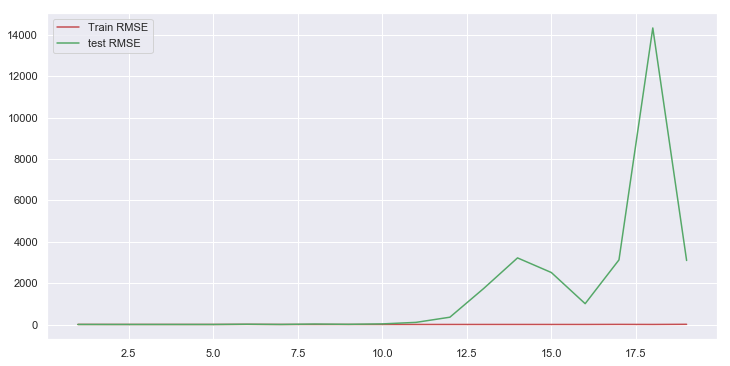

In [68]:
plt.figure(figsize=(12, 6))

# Train MSE
plt.plot(results.degrees, results.train_mse, color='r', label='Train RMSE', alpha=1)

# Test MSE
plt.plot(results.degrees, results.test_mse, color='g', label='test RMSE', alpha=1)

plt.legend();

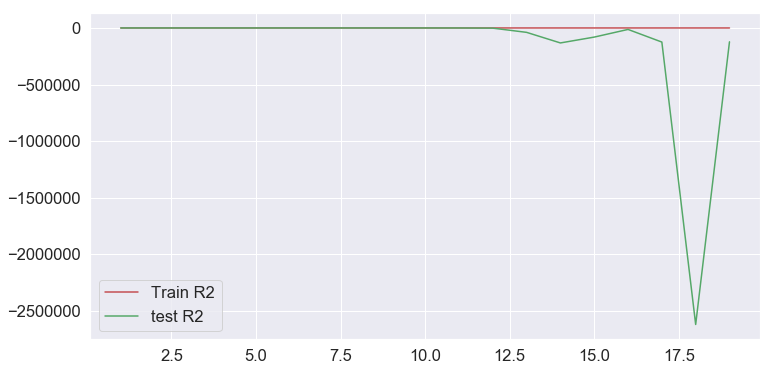

In [376]:
plt.figure(figsize=(12, 6))

# Train R2
plt.plot(results.degrees, results.train_r2, color='r', label='Train R2', alpha=1)

# Test R2
plt.plot(results.degrees, results.test_r2, color='g', label='test R2', alpha=1)

plt.legend();